# IMPORTING LIBRARIES

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

# IMPORTING DATA 

In [433]:
df = pd.read_csv('/root/Desktop/bigmart_sales.csv')

In [434]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# CHECKING NULL VALUES

In [435]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# TREATING THE MISSING VALUES

In [436]:
df["Item_Weight"].mean()

12.857645184135976

In [437]:
df["Item_Weight"] = df["Item_Weight"].fillna(12.85)

In [438]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [439]:
df = df.dropna()
df = df.reset_index(drop=True)

In [440]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [441]:
df['Outlet_Location_Type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Tier 1
1       Tier 3
2       Tier 1
3       Tier 3
4       Tier 3
         ...  
6108    Tier 1
6109    Tier 3
6110    Tier 2
6111    Tier 3
6112    Tier 1
Name: Outlet_Location_Type, Length: 6113, dtype: object>

In [ ]:
df['Outlet_Establishment_Year'].value_counts

In [ ]:
df['Outlet_Size'].value_counts

In [ ]:
df.dtypes

# CORRELATION BETWEEN THE COLUMNS

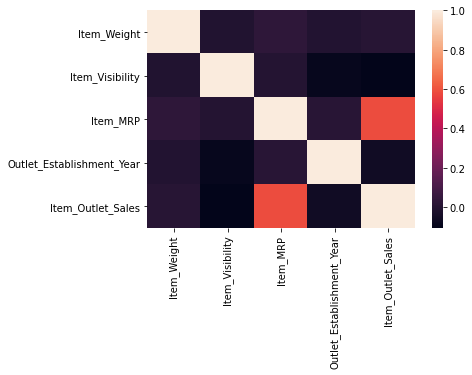

In [442]:
sns.heatmap(df.corr())
plt.show()

# CHECKING DATA TYPES AND IF DIFFERNT CONVERTING IT TO THE REQUIRED DATA TYPE

In [443]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [444]:
df.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [445]:
df['Item_Weight'] = df['Item_Weight'].astype(np.int64)

In [446]:
df['Item_MRP'] = df['Item_MRP'].astype(np.int64)

In [447]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(np.int64)

In [448]:
df.dtypes

Item_Identifier                int64
Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                       int64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales              int64
dtype: object

# CHECKIING OUTLIERS

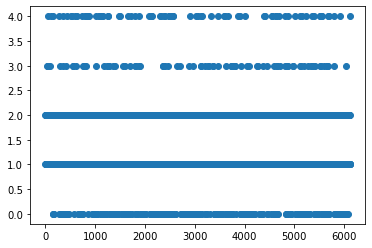

In [449]:
plt.scatter(df.index, df['Item_Fat_Content'])

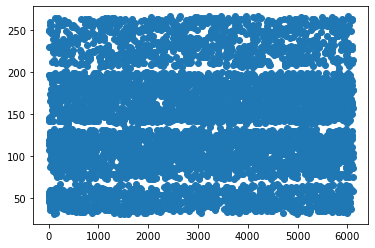

In [450]:
plt.scatter(df.index, df['Item_MRP'])

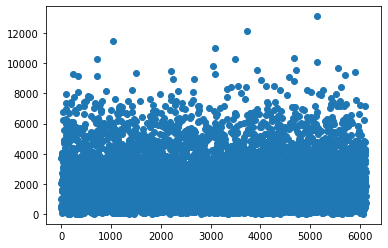

In [451]:
plt.scatter(df.index, df['Item_Outlet_Sales'])

# TREATING OUTLIERS

In [452]:
li = list(df['Item_Outlet_Sales'].sort_values()[-4:].index)

In [453]:
df['Item_Outlet_Sales'][li] = int(df.drop(li)['Item_Outlet_Sales'].mean())

<ipython-input-453-e6945a409cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Outlet_Sales'][li] = int(df.drop(li)['Item_Outlet_Sales'].mean())


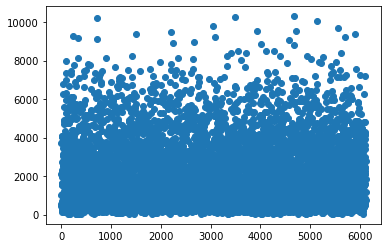

In [454]:
plt.scatter(df.index, df['Item_Outlet_Sales'])

In [455]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100

Significance.sort_values()

Item_Fat_Content              77.981624
Item_Weight                   86.453288
Outlet_Size                   89.159503
Outlet_Establishment_Year     94.357203
Outlet_Location_Type          94.901313
Item_Type                     99.999998
Item_Identifier              100.000000
Item_Visibility              100.000000
Item_MRP                     100.000000
Outlet_Identifier            100.000000
Outlet_Type                  100.000000
dtype: float64

In [456]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# LOGISTIC REGRESSION

In [458]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [459]:
log = LogisticRegression()
log_boost = AdaBoostClassifier(base_estimator = log,n_estimators = 170)

In [ ]:
log_boost.fit(X_train,y_train)
pred= log_boost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("

In [ ]:
#log.fit(X_train,y_train)

In [ ]:
#pred = log.predict(X_test)
#pred

In [ ]:
log_boost.score(X_test, pred)*100

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test,pred)*100

In [ ]:
confusion_matrix(y_test,pred)

# SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

In [ ]:
model = SVC()
model.fit(X_train, y_train)

In [ ]:
y_predictions = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predictions))

In [ ]:
print(classification_report(y_test,y_predictions)) 

In [ ]:
print("(in %):",accuracy_score(y_test, y_predictions)*100)

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

In [ ]:
gnb = GaussianNB() 

In [ ]:
gnb.fit(X_train, y_train) 

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

In [ ]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)